# 🚗 CO2 Emissions Analysis with Linear Regression

In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:

df = pd.read_csv(r'C:\Users\Infinix X2\Documents\SEMESTER 8\Data Science\DATASET\co2.csv')
df.head()


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## 🔍 Data Cleaning: Hilangkan Duplikat & Kosong

In [5]:

original_len = len(df)
df = df.drop_duplicates()
after_dupe = len(df)
df = df.dropna()
final_len = len(df)

print(f"Duplikat yang dihapus: {original_len - after_dupe}")
print(f"Data kosong yang dihapus: {after_dupe - final_len}")
print(f"Total data akhir: {final_len}")

print(df.isnull().sum())


Duplikat yang dihapus: 1103
Data kosong yang dihapus: 0
Total data akhir: 6282
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


## 📊 Visualisasi Korelasi & Distribusi

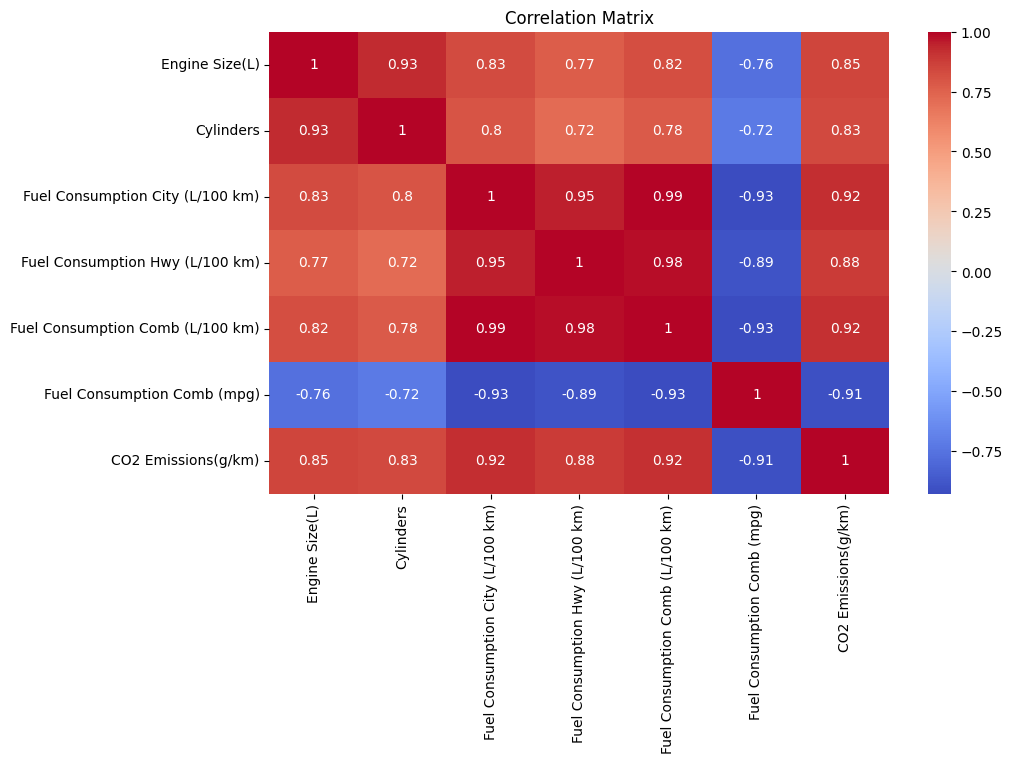

In [6]:

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


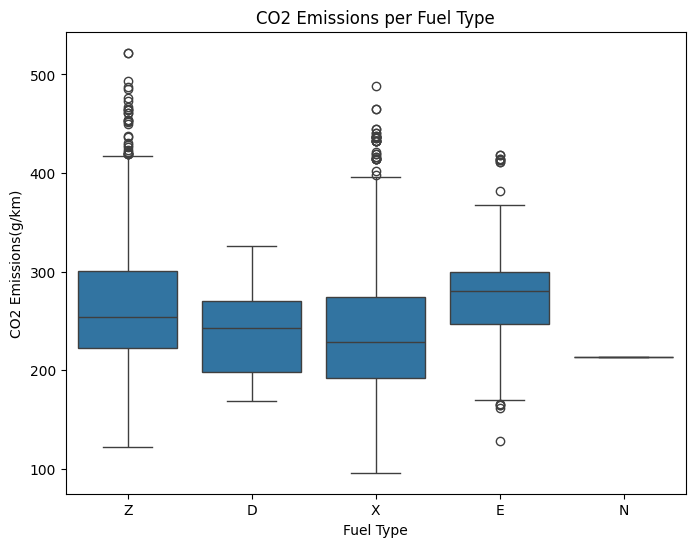

In [7]:

plt.figure(figsize=(8,6))
sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=df)
plt.title('CO2 Emissions per Fuel Type')
plt.show()


## 🧠 Model Regresi Linear

In [8]:

features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
            'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
            'Fuel Consumption Comb (mpg)']

X = df[features]
y = df['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R2 Score: {r2:.2f}')


Mean Squared Error: 368.32
R2 Score: 0.90


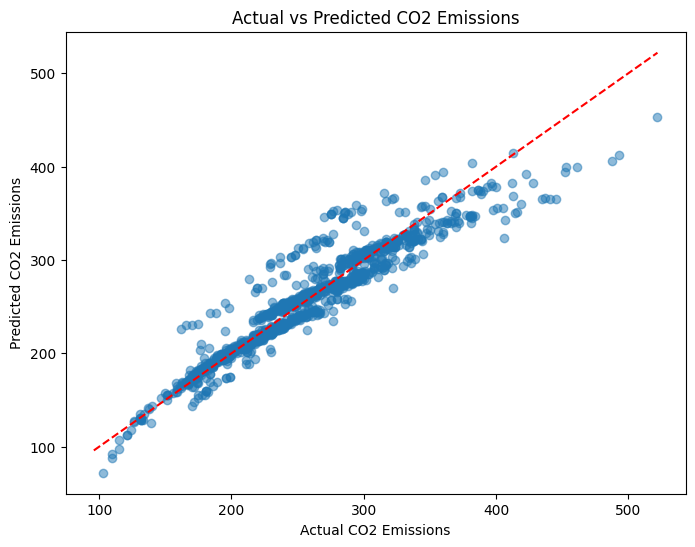

In [9]:

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()
